In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from scipy.misc import derivative

In [5]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [6]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

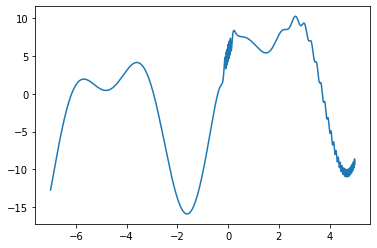

In [5]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

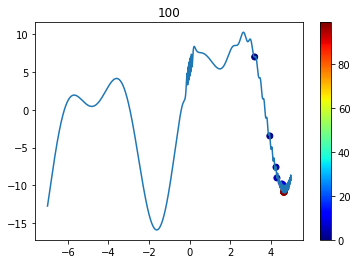

In [7]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

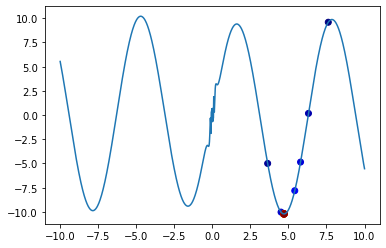

In [113]:
x=np.linspace(-10,10,1000)
def func(x):
    return 10*np.sin(x) - np.sin(1/x)
max_iteration = 50

def gradient_descent(function,X,max_it):
    """
    this function takes function, range of X and maximum iteration value as an input.
    it iterates through range of X, randomly generates index in the bound of X range,
     calculates the derivative at the given point.
    
    if derivative is negative at the current point, it modifies the range of X so that,
    modified version become -> [ current X, .... ]

    else (derivative is positive), it modifies the range of X so that it becomes -> [ ..., current X ]
    
    looping goes on, till iteration reaches  its given max point, or minimum is found 


    """
    x=np.linspace(-10,10,1000)
    index = np.random.randint(0,len(X))
    point = X[index]
    deriv = derivative(function,point)
    threashold = 0.01
    itr=0
    points = []

    while np.abs(deriv) > threashold and itr < max_it:
        if deriv < 0 :
            X = X[index:]
            points.append(point)
            index = np.random.randint(0,len(X))
            point = X[index]
            deriv = derivative(function,point)
            
        else:
            X=X[:index+1]
            points.append(point)
            index = np.random.randint(0,len(X))
            point = X[index]
            deriv = derivative(function,point)
        itr += 1

    plt.plot(x,function(x))
    plt.scatter(np.array(points),function(np.array(points)),c=range(len(points)),cmap=cm.jet)

gradient_descent(func,x,max_iteration)

            
            




## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [9]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [58]:
area_under_the_curve = result[0]

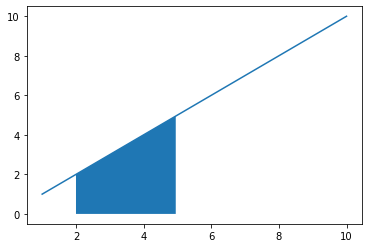

In [10]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
def func(x):
    return -x
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

15.0


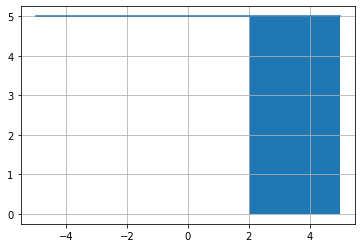

In [11]:
a,b = [2,5]
x = np.linspace(-5,5,1000)

def func(x):
    return 5*np.ones_like(x)

result = integrate.quad(func,a,b)
print(result[0])
plt.plot(x,func(x))
ranges = np.linspace(a,b,100)
plt.fill_between(ranges,func(ranges))
plt.grid()

2. interval = \[-1,1\]

Function f(x) = 1/x

In [135]:
def function(x):
        return 1/x 
a1,b1 = [1e-6,1]
a2,b2 = [-1,-1e-6]       
area = integrate.quad(function,a2,b2)[0] + integrate.quad(function,a1,b1)[0]
print(area)
 

0.0


2. interval = \[-pi,pi\]

Function f(x) = sin(x)

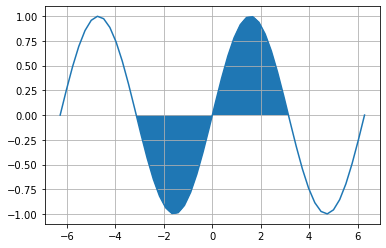

In [12]:
def f(x):
    return np.sin(x)
a,b = [-np.pi,np.pi]
integrate.quad(f,a,b)
ranges= np.linspace(-2*np.pi,2*np.pi)
bound = np.linspace(a,b,100)
plt.plot(ranges,f(ranges))

plt.fill_between(bound,f(bound))
plt.grid()

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


4.3598356225107897e-16


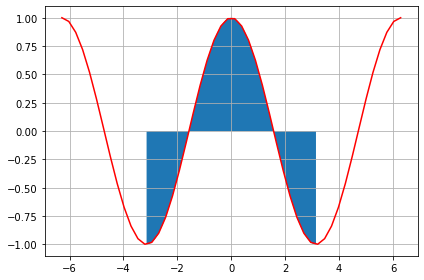

In [15]:
def f(x):
    return np.cos(x)
a,b = [-np.pi,np.pi]
area = integrate.quad(f,a,b)
print(area[0])

ranges= np.linspace(-2*np.pi,2*np.pi)
bound = np.linspace(a,b,100)
plt.plot(ranges,f(ranges),c='r')
plt.fill_between(bound,f(bound))
plt.grid()
plt.tight_layout()

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

4.3598356225107897e-16


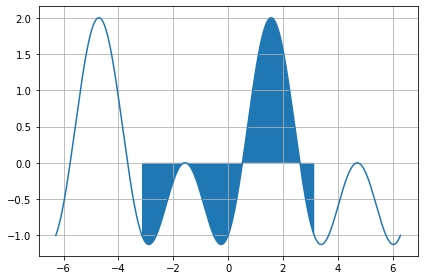

In [141]:
def f(x):
    return np.sin(x)-np.cos(2*x)
a,b = [-np.pi,np.pi]
area = integrate.quad(f,a,b)
print(area[0])

graph_range= np.linspace(-2*np.pi,2*np.pi,1000)
bound = np.linspace(a,b,100)
plt.plot(graph_range,f(graph_range))
plt.fill_between(bound,f(bound))
plt.grid()
plt.tight_layout()